### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from os.path import join
from skimage import color, io

if not os.path.exists("imgs"):
    os.makedirs("imgs")

### Speed transfers in relation to start velocity and phase of interacting bees

In [49]:
def plot_binned_speed_changes(matrix, save_to=None, binning_var="start_vel",
                              type="real"):
    
    matplotlib.rcParams.update({"font.size": 5, "ytick.major.size": 1,
                                "ytick.major.width": 0.4, "font.sans-serif": "Arial"})
    
    fig, axs = plt.subplots(1, 1, figsize=(1.67, 1.67), dpi=300)
    
    # Set labels and title.
    label = "Speed change of focal bee [mm/s]"
    bin_label = "Start velocity" if binning_var == "start_vel" else "Time of peak activity\n"
    title = "Null-model" if type == "null" else "Real data"
    unit = f"[$n$th 6-quantile]"
    
    # Colorbar settings.
    cbar_kws = {"label": label, "shrink": 0.8}
    if binning_var == "phase":
        cbar_kws["ticks"] = [0.04, 0.05]
    elif binning_var == "start_vel":
        cbar_kws["ticks"] = [-0.9,-0.6,-0.3,0,0.3]
    cbar_kws["ticks"] = None
        
    # Set constant colormap range for real data and null-model.
    color_range = (-1.02, 0.4) if binning_var == "start_vel" else (0.0395, 0.055)
    color_range = (None, None)
    
    # Plot.
    sns.heatmap(matrix, annot=False, cmap="viridis", robust=True, ax=axs,
                cbar_kws=cbar_kws, linewidths=0, alpha=0.95,
                vmin=color_range[0], vmax=color_range[1])
    
    axs.invert_yaxis()
    axs.set(xlabel=f"{bin_label} of focal bee {unit}",
            ylabel=f"{bin_label} of non-focal bee {unit}",
            title=title)
    axs.tick_params(size=0)

    # Save as vector graphic.
    if save_to:
        plt.savefig(save_to, bbox_inches="tight")
    plt.show()    

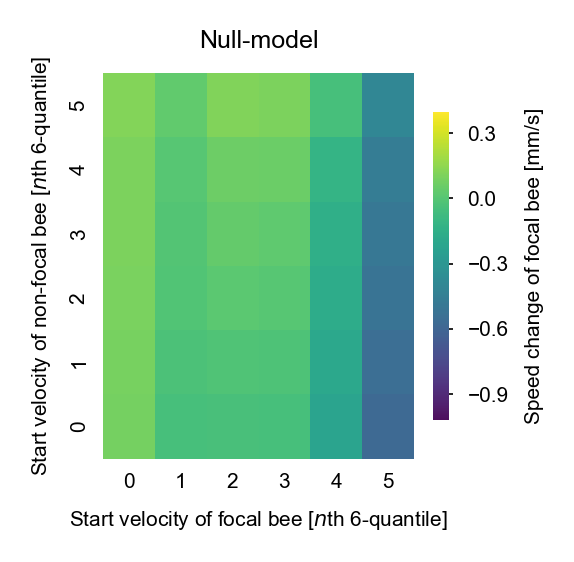

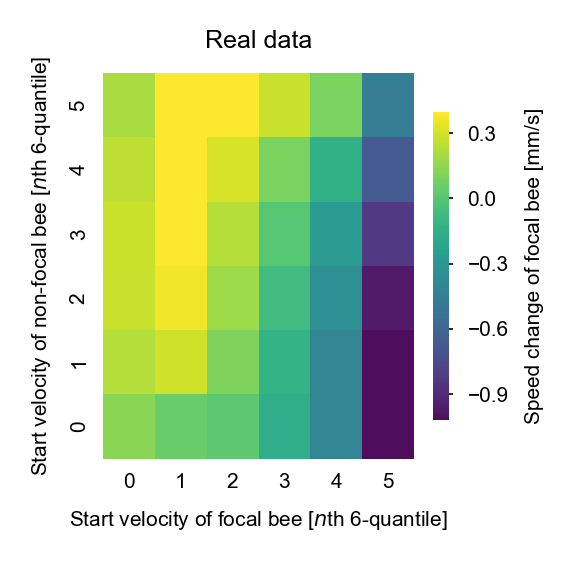

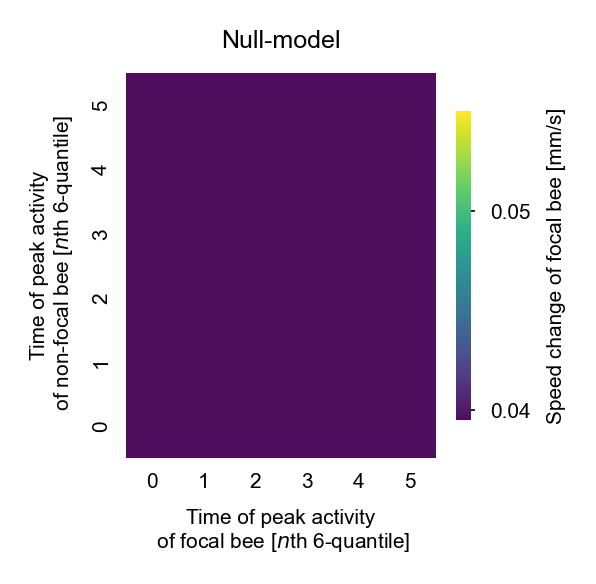

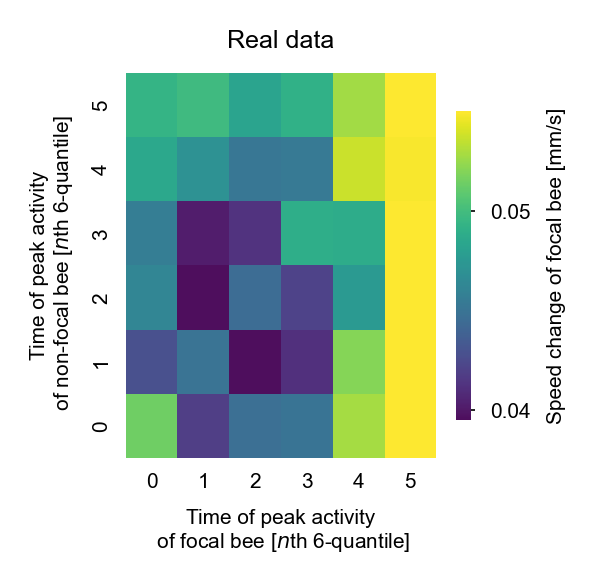

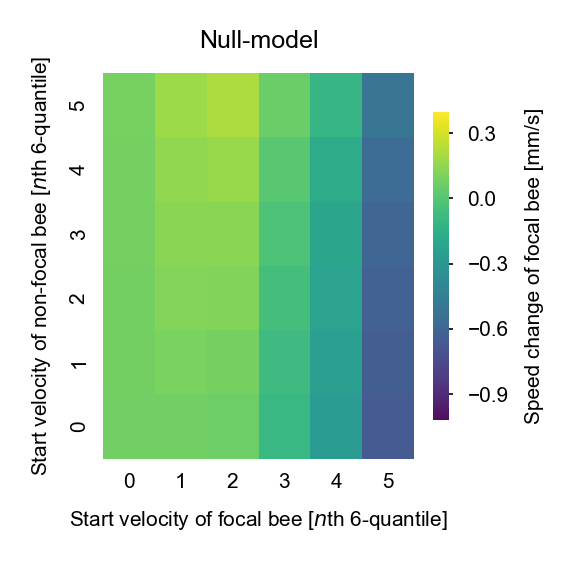

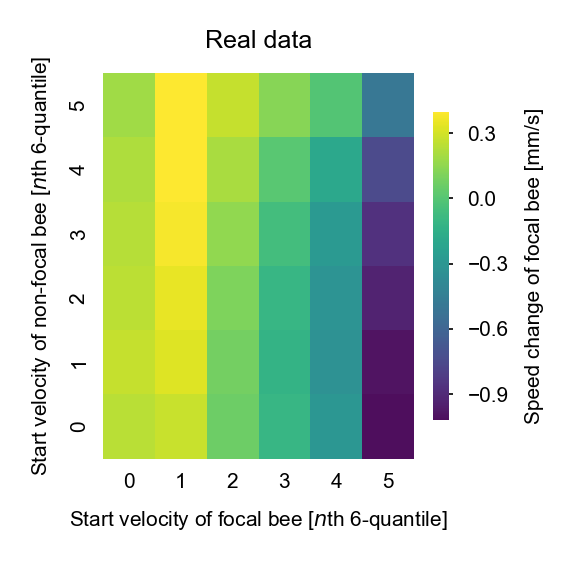

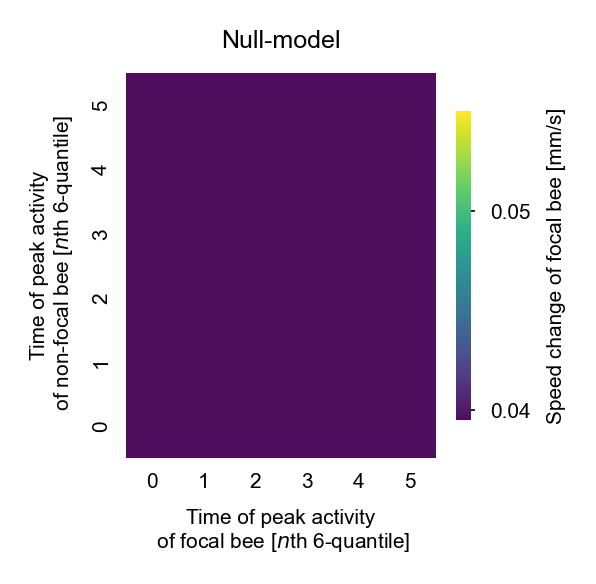

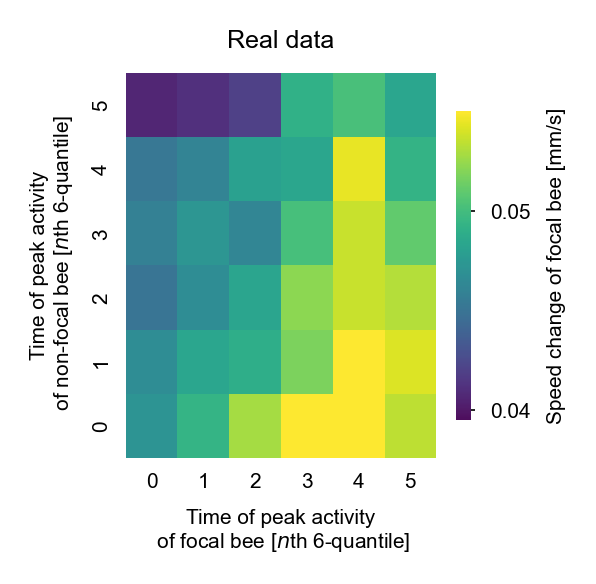

In [7]:
for year in [2016, 2019]:
    for binning_var in ["start_vel", "phase"]:
        for type in ["null", "real"]:
            filename = f"speed_change_vs_{binning_var}_{type}.npy"
            matrix = np.load(os.path.join(os.pardir, "aggregated_results", str(year), filename))
            save_to = os.path.join("imgs", filename.strip(".npy") + f"_{year}.svg")
            plot_binned_speed_changes(matrix, save_to=save_to,
                                      binning_var=binning_var,
                                      type=type)

### Welch's t-test results
(todo: edit if we keep this)

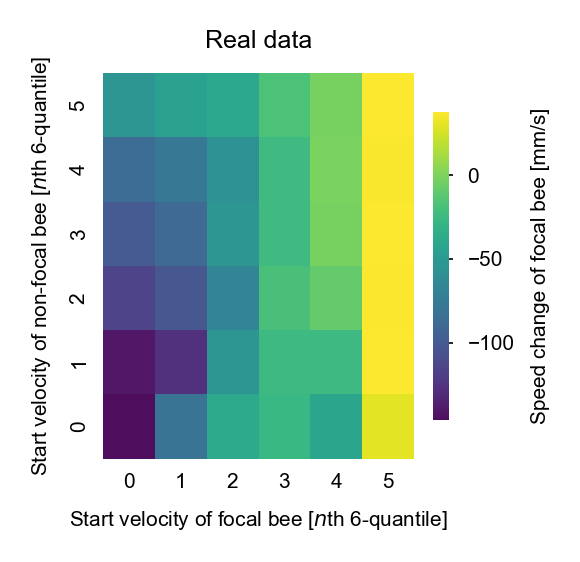

In [52]:
test_results_2016 = pd.read_csv('/Users/weronik22/Documents/circadians/speedtransfer/aggregated_results/2016/test_vel_change_side0_2016_start_vel.csv', index_col=0)
test_results_2016 = test_results_2016.loc[test_results_2016.test_name == 'Welch test']

df = test_results_2016.groupby('bin_pair')['test_statistic'].mean()
ii = np.repeat(np.arange(6),6)
jj = np.resize(np.arange(6),6*6)

matrix_vals = pd.DataFrame({'bin0': ii, 'bin1':jj, 'test_stat':df.values})
matrix = pd.pivot_table(data=matrix_vals, index='bin0', columns='bin1', values='test_stat')
# matrix = np.sign(matrix)
plot_binned_speed_changes(matrix, save_to=None,
                            binning_var='start_vel',
                            type=type)

### Speed transfers in relation to point of interaction on interacting bee's body

In [10]:
def plot_body_location_of_interactions(vel_change_matrix_df, ax=None,
                                       vmin=None, vmax=None, whose_change="focal"):

    
    sns.scatterplot(data=vel_change_matrix_df, x="x", y="y",
                    hue="vel_change_bee_%s" % whose_change, palette="viridis",
                    hue_norm=(-0.02,0.12), size="count", sizes=(0, 70),
                    ax=ax)

    # Add legend.
    handles, labels = ax.get_legend_handles_labels()
    labels = ["Speed change [mm/s]" if item == "vel_change_bee_%s" % whose_change else item for item in labels]
    labels = ["Count" if item == "count" else item for item in labels]
    handles.insert(7, handles[0])
    labels.insert(7, "")
    ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1.03, 1.1))

    # Add labels.
    ax.set_xlabel("x position [mm]")
    ax.set_ylabel("y position [mm]")
    ax.set_title("Speed change of %s bee" % "-".join(whose_change.split("_")))
    
    # plt.show()
        

def add_bee_image_to_plot(df, save_to="body_loc.svg", whose_change="focal"):

    # Bee image for background.
    img = color.rgb2gray(io.imread(os.path.join("imgs", "bee_img.jpg")))
    matplotlib.rcParams.update({"font.size": 5,
                                "ytick.major.size": 0,
                                "ytick.major.width": 0,
                                "xtick.major.size": 0,
                                "xtick.major.width": 0})
    fig, axs = plt.subplots(1,1,figsize=(2.4,1.57), dpi=300)

    axs.imshow(img, extent=[-1, 16, -1, 9], cmap="gray", alpha=0.3, aspect="auto")
    
    plot_body_location_of_interactions(df, ax=axs, whose_change=whose_change)
    plt.savefig(join("imgs", save_to))
    plt.show()

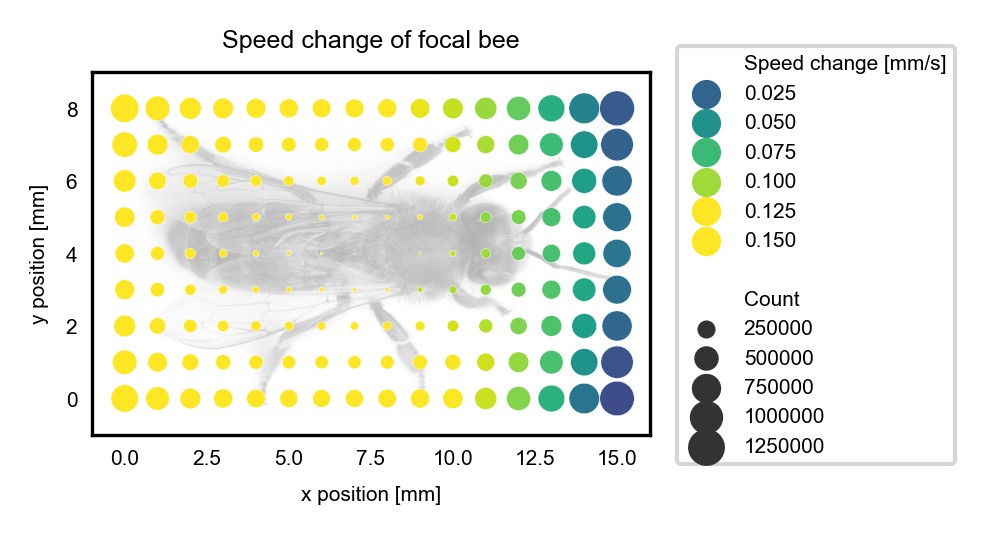

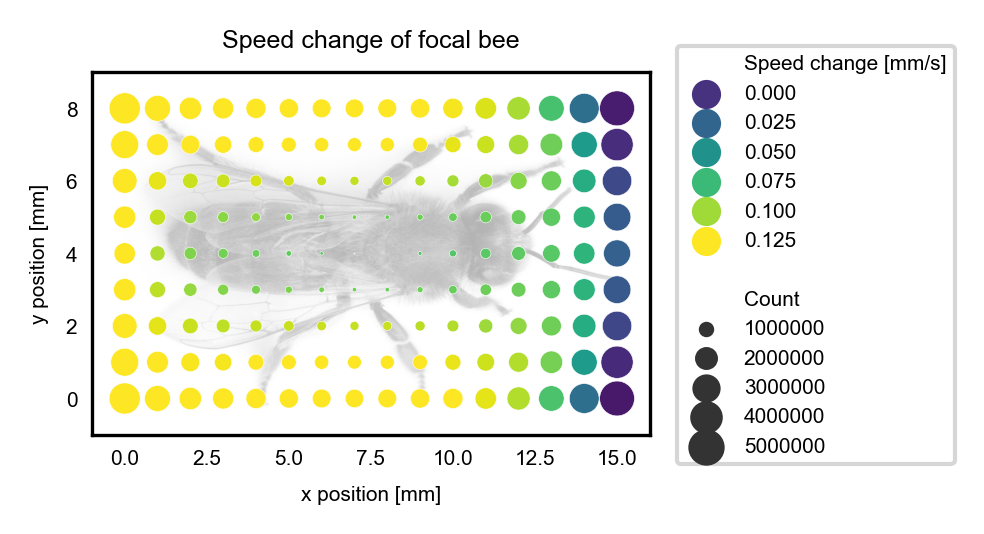

In [11]:
for year in [2016, 2019]:
    # Load data.
    df = pd.read_csv(os.path.join(os.pardir, "aggregated_results", str(year), 'speed_change_per_body_pos.csv'), index_col=0)
    save_to = f"speed_change_per_body_pos_{year}.svg"
    add_bee_image_to_plot(df, save_to=save_to)